<a href="https://colab.research.google.com/github/deokwoo-han/abc/blob/master/09_28_5_LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [ ]:
#importing data
df = pd.read_csv("./credit_cards_dataset.csv")

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#df_features=df[['PAY_SCORE_AVG','PAY_AMT_AVG_US','CREDIT_UTILIZATION','BILL_AVG_US','AGE','DEFAULT_PAYMENT_NEXT_MO']]
#df_features.head()

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
#assigning data
X = df.drop(['ID', 'default.payment.next.month'], axis = 1).values
y = df['default.payment.next.month'].values.reshape(-1, 1)
print(X.shape)
print(y.shape)

(30000, 23)
(30000, 1)


In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.30)

In [ ]:
#processing data with StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

평균이 0 분산값이 1인 값으로 스탠더드 스케일을 해서 스케일링을 맞춰줌, 매핑이

In [ ]:
test_df = pd.DataFrame(X_train_scaled)

In [ ]:
test_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
count,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.22,-1.24,-2.34,-2.97,-1.57,-1.76,-1.56,-1.53,-1.52,-1.53,-1.48,-2.95,-1.68,-1.56,-3.33,-2.01,-4.19,-0.33,-0.24,-0.29,-0.30,-0.31,-0.30
25%,-0.91,-1.24,-1.08,-1.05,-0.81,-0.87,-0.72,-0.70,-0.67,-0.65,-0.61,-0.65,-0.65,-0.64,-0.64,-0.64,-0.64,-0.28,-0.20,-0.26,-0.29,-0.29,-0.29
50%,-0.21,0.81,0.19,0.86,-0.16,0.01,0.11,0.14,0.19,0.23,0.25,-0.39,-0.39,-0.39,-0.38,-0.37,-0.37,-0.21,-0.16,-0.19,-0.21,-0.21,-0.21
75%,0.56,0.81,0.19,0.86,0.70,0.01,0.11,0.14,0.19,0.23,0.25,0.22,0.20,0.19,0.18,0.17,0.18,-0.04,-0.04,-0.04,-0.06,-0.05,-0.07
max,6.44,0.81,5.24,2.78,4.28,7.11,6.77,6.84,7.03,7.29,7.17,12.47,13.19,23.35,13.28,14.66,15.60,51.47,66.83,48.89,38.23,26.62,29.46


In [ ]:
#creating model
model=LinearRegression()

In [ ]:
#fit the model to training data
model.fit(X_train_scaled,y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Checking training and testing scores
train=model.score(X_train_scaled,y_train_scaled)
test=model.score(X_test_scaled,y_test_scaled)

print('Testing Score is:', test)
print('Training Score is:', train) 
##hmm, the scores are awfully low....

Testing Score is: 0.11528972027826279
Training Score is: 0.12728008213511455


In [ ]:
#회귀계수 찍는 법
model.coef_#.shape #아이디가 빠짐

array([[-0.0300698 , -0.01743359, -0.02752641, -0.02903335,  0.03474356,
         0.25906011,  0.06199753,  0.03755388,  0.01304225,  0.00344839,
         0.00993396, -0.1166236 ,  0.04147631,  0.01258386, -0.02151333,
        -0.0190111 ,  0.02065313, -0.02614979, -0.01122923,  0.00309809,
        -0.00305095, -0.01297396, -0.00633476]])

In [ ]:
model.intercept_ #선형 모델이라서 이럴 수 있었지, 넌 리니어였으면 매우 복잡
#예측 모형을 수식으로 표현하면 모델링을 할 수가 있음

array([-1.2098291e-16])

y = -1.2098291e-16 +  -0.03*X0 - 0.017*X1 .... - 0.00633*X23 

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

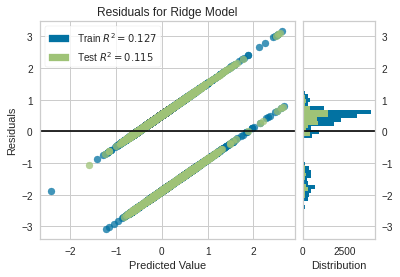

In [ ]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train_scaled, y_train_scaled)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test_scaled)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data #릿지 l2 loss 노멀라

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.870727550310501, R2: 0.11528972027826279


In [ ]:
#predictions

In [ ]:
predictions[:30]

array([[ 0.06519955],
       [-0.11164462],
       [-0.00569369],
       [ 0.0685067 ],
       [-0.02669815],
       [-0.27098054],
       [ 0.36131803],
       [ 0.15323742],
       [-0.37464349],
       [-0.19300328],
       [ 0.7209764 ],
       [-0.13799076],
       [ 0.03031278],
       [ 1.13071597],
       [-0.2133864 ],
       [-0.20287796],
       [-0.07068596],
       [ 0.18284043],
       [-0.51925225],
       [ 0.76430168],
       [-0.00561049],
       [ 0.00535812],
       [ 0.04200585],
       [-0.03464286],
       [-0.19929277],
       [-0.20349299],
       [-0.50730999],
       [ 0.81919398],
       [-0.13411657],
       [-0.24152587]])

In [ ]:
predictions.T

array([[ 0.06519955, -0.11164462, -0.00569369, ...,  0.017112  ,
        -0.07234632, -0.56249072]])

In [ ]:
import numpy as np

predictions=np.rint(predictions)
predictions#.reshape(-1,1)

array([[ 0.],
       [-0.],
       [-0.],
       ...,
       [ 0.],
       [-0.],
       [-1.]])

In [ ]:
#np.round(arr)

In [ ]:
predictions = np.array([np.round(np.absolute(value)) for value in predictions])

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
y_test[:3]

array([[0],
       [0],
       [0]])

In [ ]:
predictions.shape

(9000, 1)

In [ ]:
y_test.shape

(9000, 1)

In [ ]:
predictions.T

array([[0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
y_test.T

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
recall_score(y_test, predictions, average='micro')

0.7396666666666667

In [ ]:
#print("Recall score:"+ str(recall_score(y_test, predictions, average='micro')))

ValueError: ignored